<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Installation" data-toc-modified-id="Installation-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Installation</a></span></li><li><span><a href="#Getting-some-resources" data-toc-modified-id="Getting-some-resources-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Getting some resources</a></span></li><li><span><a href="#Poking-around" data-toc-modified-id="Poking-around-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Poking around</a></span><ul class="toc-item"><li><span><a href="#df_store" data-toc-modified-id="df_store-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>df_store</a></span></li><li><span><a href="#Viewing-trajectories" data-toc-modified-id="Viewing-trajectories-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Viewing trajectories</a></span><ul class="toc-item"><li><span><a href="#Viewing-a-single-trajectory" data-toc-modified-id="Viewing-a-single-trajectory-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Viewing a single trajectory</a></span></li><li><span><a href="#Flip-over-all-(or-some)-trajectories" data-toc-modified-id="Flip-over-all-(or-some)-trajectories-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Flip over all (or some) trajectories</a></span></li></ul></li><li><span><a href="#Making-a-pdf-of-trajectories" data-toc-modified-id="Making-a-pdf-of-trajectories-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Making a pdf of trajectories</a></span></li><li><span><a href="#Demo-s-and-v" data-toc-modified-id="Demo-s-and-v-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Demo s and v</a></span></li><li><span><a href="#cstore" data-toc-modified-id="cstore-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>cstore</a></span></li><li><span><a href="#pstore" data-toc-modified-id="pstore-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>pstore</a></span></li><li><span><a href="#Scrap-place" data-toc-modified-id="Scrap-place-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Scrap place</a></span></li></ul></li><li><span><a href="#Potential-Calculus-Experimentations" data-toc-modified-id="Potential-Calculus-Experimentations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Potential Calculus Experimentations</a></span></li><li><span><a href="#Extra-scrap" data-toc-modified-id="Extra-scrap-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Extra scrap</a></span></li></ul></div>

In [1]:
# %load_ext autoreload
# %autoreload 2

# Introduction

ODUS (for Older Drug User Study) contains data and tools to study the drug use of older drug users.

Essentially, there are these are tools:
* To get prepared data on the 119 "trajectories" describing 31 variables (drug use, social, etc.) over time of 119 different respondents.
* To vizualize these trajectories in various ways
* To create pdfs of any selection of these trajectories and variables
* To make count tables for any combinations of the variables: Essential step of any Markovian or Bayesian analysis.
* To make probability (joint or conditional) tables from any combination of the variables
* To operate on these count and probability tables, thus enabling inference operations


# Installation

You need to have python 3.7+ to run this notebook.

And you'll need to have `odus`, which you get by doing

```
pip install odus
```

(And if you don't have pip then, well... how to put it... ha ha ha!)

But if you're the type, you can also just get the source from `https://github.com/thorwhalen/odus`. 

Oh, and pull requests etc. are welcome!

Stars, likes, references, and coffee also welcome.

And if you want to donate: Donate to a charity that will help the people understand and make policies surrounding the use of substances.

A simple flowchart about the architecture:

<img src="odus_store.png" width=800 height=800>

# Getting some resources

In [1]:
from matplotlib.pylab import *
from numpy import *
import seaborn as sns

import os
from py2store.stores.local_store import RelativePathFormatStore
from py2store.mixins import ReadOnlyMixin
from py2store.base import Store


from io import BytesIO
from spyn.ppi.pot import Pot, ProbPot
from collections import UserDict, Counter
import numpy as np
import pandas as pd

from ut.ml.feature_extraction.sequential_var_sets import PVar, VarSet, DfData, VarSetFactory
from IPython.display import Image

from odus.analysis_utils import *

from odus.dacc import DfStore, counts_of_kps, Dacc, VarSetCountsStore, \
    mk_pvar_struct, PotStore, _commun_columns_of_dfs, Struct, mk_pvar_str_struct, VarStr

from odus.plot_utils import plot_life_course

In [2]:
from odus import data_dir, data_path_of
survey_dir = data_dir
data_dir

'/D/Dropbox/dev/p3/proj/odus/odus/data'

In [3]:
df_store = DfStore(data_dir + '/{}.xlsx')
len(df_store)
cstore = VarSetCountsStore(df_store)
v = mk_pvar_struct(df_store, only_for_cols_in_all_dfs=True)
s = mk_pvar_str_struct(v)
f, df = cstore.df_store.head()
pstore = PotStore(df_store)

# Poking around

## df_store

A df_store is a key-value store where the key is the xls file and the value is the prepared dataframe

In [4]:
len(df_store)

119

In [5]:
it = iter(df_store.values())
for i in range(5):  # skip five first
    _ = next(it)
df = next(it)  # get the one I want
df.head(3)

category,RURAL,SUBURBAN,URBAN/CITY,HOMELESS,INCARCERATION,WORK,SON/DAUGHTER,SIBLING,FATHER/MOTHER,SPOUSE,...,METHAMPHETAMINE,AS PRESCRIBED OPIOID,NOT AS PRESCRIBED OPIOID,HEROIN,OTHER OPIOID,INJECTED,IN TREATMENT,Selects States below,Georgia,Pennsylvania
age,,,,,,,,,,,,,,,,,,,,,
11,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0
12,0,1,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,1,1,0
13,0,1,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [6]:
print(df.columns.values)

['RURAL' 'SUBURBAN' 'URBAN/CITY' 'HOMELESS' 'INCARCERATION' 'WORK'
 'SON/DAUGHTER' 'SIBLING' 'FATHER/MOTHER' 'SPOUSE'
 'OTHER (WHO?, FILL IN BRACKETS HERE)' 'FRIEND USER' 'FRIEND NON USER'
 'MENTAL ILLNESS' 'PHYSICAL ILLNESS' 'LOSS OF LOVED ONE' 'TOBACCO'
 'MARIJUANA' 'ALCOHOL' 'HAL/LSD/XTC/CLUBDRUG' 'COCAINE/CRACK'
 'METHAMPHETAMINE' 'AS PRESCRIBED OPIOID' 'NOT AS PRESCRIBED OPIOID'
 'HEROIN' 'OTHER OPIOID' 'INJECTED' 'IN TREATMENT' 'Selects States below'
 'Georgia' 'Pennsylvania']


In [7]:
t = df[['ALCOHOL', 'TOBACCO']]
t.head(3)

category,ALCOHOL,TOBACCO
age,,
11,0,0
12,0,0
13,0,0


In [8]:
c = Counter()
for i, r in t.iterrows():
    c.update([tuple(r.to_list())])
c

Counter({(0, 0): 6, (1, 0): 4, (1, 1): 9, (0, 1): 2})

In [9]:
def count_tuples(dataframe):
    c = Counter()
    for i, r in dataframe.iterrows():
        c.update([tuple(r.to_list())])
    return c

In [10]:
fields = ['ALCOHOL', 'TOBACCO']
# do it for every one
c = Counter()
for df in df_store.values():
    c.update(count_tuples(df[fields]))
c

Counter({(0, 1): 903, (1, 1): 1343, (0, 0): 240, (1, 0): 179})

In [11]:
pd.Series(c)

0  1     903
1  1    1343
0  0     240
1  0     179
dtype: int64

In [12]:
# Powerful! You can use that with several pairs and get some nice probabilities. Look up Naive Bayes.

## Viewing trajectories

In [13]:
import itertools
from functools import partial
from odus.util import write_images
from odus.plot_utils import plot_life, life_plots, write_trajectories_to_file

ihead = lambda it: itertools.islice(it, 0, 5)

### Viewing a single trajectory

k: surveys/B24.xlsx


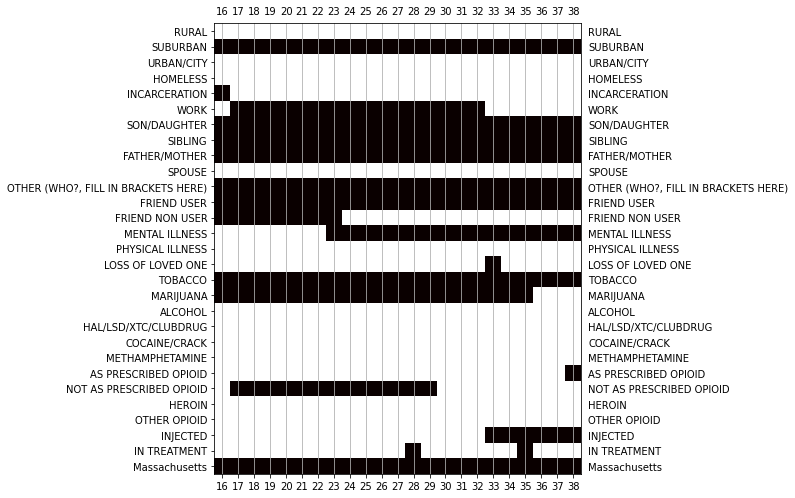

In [14]:
k = next(iter(df_store))  # get the first key
print(f"k: {k}")  # print it
plot_life(df_store[k])  # plot the trajectory

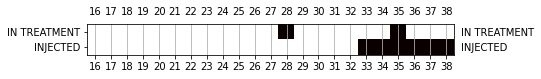

In [15]:
plot_life(df_store[k], fields=[s.in_treatment, s.injected])  # only want two fields

### Flip over all (or some) trajectories

In [16]:
gen = life_plots(df_store)

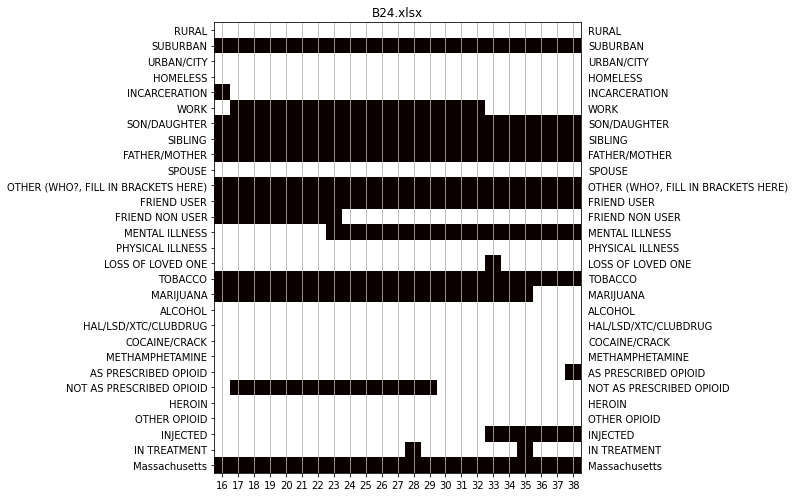

In [17]:
next(gen)  # launch to get the next trajectory

Get three trajectories, but only over two fields.

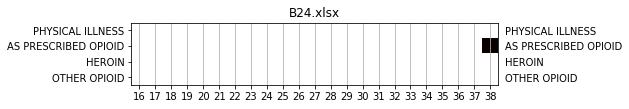

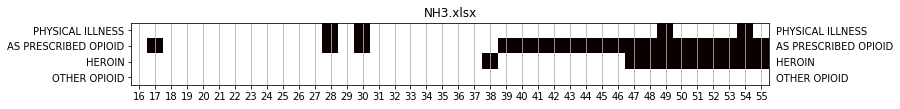

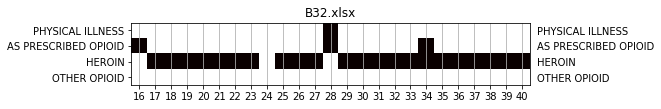

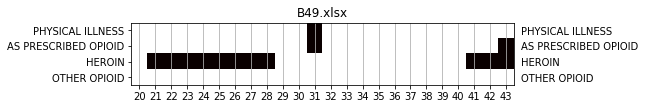

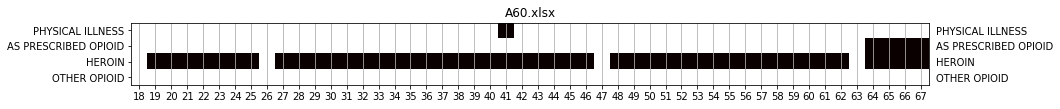

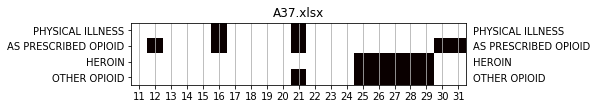

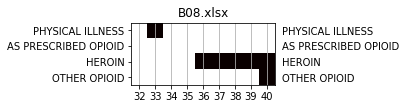

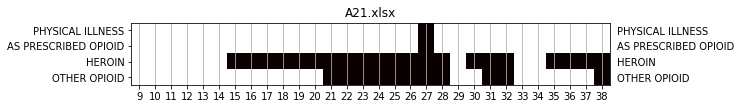

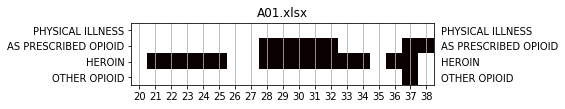

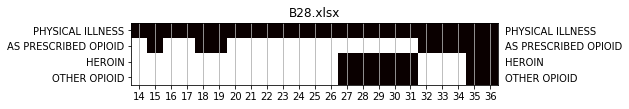

In [18]:
# fields = [s.in_treatment, s.injected]
fields = [s.physical_illness, s.as_prescribed_opioid, s.heroin, s.other_opioid]
keys = list(df_store)[:10]
# print(f"keys={keys}")
axs = [x for x in life_plots(df_store, fields, keys=keys)];

## Making a pdf of trajectories

In [26]:
write_trajectories_to_file(df_store, fields, keys, fp='three_respondents_two_fields.pdf');

In [ ]:
write_trajectories_to_file(df_store, fp='all_respondents_all_fields.pdf');

## Demo s and v

In [21]:
print(list(filter(lambda x: not x.startswith('__'), dir(s))))

['alcohol', 'as_prescribed_opioid', 'cocaine_crack', 'father_mother', 'hal_lsd_xtc_clubdrug', 'heroin', 'homeless', 'in_treatment', 'incarceration', 'injected', 'loss_of_loved_one', 'marijuana', 'mental_illness', 'methamphetamine', 'not_as_prescribed_opioid', 'other_opioid', 'physical_illness', 'rural', 'sibling', 'son_daughter', 'suburban', 'tobacco', 'urban_city', 'work']


In [22]:
s.heroin

'HEROIN'

In [23]:
v.heroin

PVar('HEROIN', 0)

In [24]:
v.heroin - 1

PVar('HEROIN', -1)

## cstore

In [21]:
# cstore[v.alcohol, v.tobacco]
cstore[v.as_prescribed_opioid-1, v.heroin]

Counter({(0, 0): 1026, (1, 0): 264, (0, 1): 1108, (1, 1): 148})

In [22]:
pd.Series(cstore[v.as_prescribed_opioid-1, v.heroin])

0  0    1026
1  0     264
0  1    1108
1  1     148
dtype: int64

In [23]:
cstore[v.alcohol, v.tobacco, v.heroin]

Counter({(0, 0, 1): 427,
         (1, 0, 1): 656,
         (1, 1, 1): 687,
         (0, 0, 0): 189,
         (0, 1, 1): 476,
         (0, 1, 0): 51,
         (1, 0, 0): 133,
         (1, 1, 0): 46})

In [24]:
cstore[v.alcohol-1, v.alcohol]

Counter({(0, 0): 994, (1, 1): 1375, (1, 0): 90, (0, 1): 87})

In [25]:
cstore[v.alcohol-1, v.alcohol, v.tobacco]

Counter({(0, 0, 1): 807,
         (1, 1, 1): 1220,
         (1, 0, 0): 26,
         (0, 1, 1): 76,
         (0, 0, 0): 187,
         (1, 1, 0): 155,
         (0, 1, 0): 11,
         (1, 0, 1): 64})

In [45]:
t = pd.Series(cstore[v.alcohol-1, v.alcohol, v.tobacco])
t.loc[t.index]

## pstore

In [36]:
t = pstore[s.alcohol-1, s.alcohol]
t

                   pval
ALCOHOL-1 ALCOHOL      
0         0         994
          1          87
1         0          90
          1        1375

In [38]:
t.tb

,ALCOHOL-1,ALCOHOL,pval
,0,0,994
,0,1,87
,1,0,90
,1,1,1375


In [40]:
t / []

                       pval
ALCOHOL-1 ALCOHOL          
0         0        0.390416
          1        0.034171
1         0        0.035350
          1        0.540063

In [41]:
t[s.alcohol-1]

           pval
ALCOHOL-1      
0          1081
1          1465

In [32]:
t / t[s.alcohol-1]  # cond prob!

                       pval
ALCOHOL-1 ALCOHOL          
0         0        0.919519
          1        0.080481
1         0        0.061433
          1        0.938567

In [33]:
tt = pstore[s.alcohol, s.tobacco]
tt

                 pval
ALCOHOL TOBACCO      
0       0         240
        1         903
1       0         179
        1        1343

In [34]:
tt / tt[s.alcohol]

                     pval
ALCOHOL TOBACCO          
0       0        0.209974
        1        0.790026
1       0        0.117608
        1        0.882392

In [35]:
tt / tt[s.tobacco]

                     pval
ALCOHOL TOBACCO          
0       0        0.572792
1       0        0.427208
0       1        0.402048
1       1        0.597952

## Scrap place

In [50]:
t = pstore[s.as_prescribed_opioid-1, s.heroin-1, s.heroin]
t


                                        pval
AS PRESCRIBED OPIOID-1 HEROIN-1 HEROIN      
0                      0        0        927
                                1        172
                       1        0         99
                                1        936
1                      0        0        249
                                1         33
                       1        0         15
                                1        115

In [51]:
tt = t / t[s.as_prescribed_opioid-1, s.heroin-1]  # cond prob!
tt

                                            pval
AS PRESCRIBED OPIOID-1 HEROIN-1 HEROIN          
0                      0        0       0.843494
                                1       0.156506
                       1        0       0.095652
                                1       0.904348
1                      0        0       0.882979
                                1       0.117021
                       1        0       0.115385
                                1       0.884615

In [55]:
tt.tb

,AS PRESCRIBED OPIOID-1,HEROIN-1,HEROIN,pval
,0,0,0,0.843494
,0,0,1,0.156506
,0,1,0,0.095652
,0,1,1,0.904348
,1,0,0,0.882979
,1,0,1,0.117021
,1,1,0,0.115385
,1,1,1,0.884615


```
AS PRESCRIBED OPIOID-1	HEROIN-1	HEROIN	
0	0	0	0.843494
0	0	1	0.156506
1	0	0	0.882979
1	0	1	0.117021
```

In [56]:
0.117021 / 0.156506

0.7477093529960512

In [48]:
prob_of_heroin_given_presc_op = 0.359223
prob_of_heroin_given_not_presc_op = 0.519213

prob_of_heroin_given_presc_op / prob_of_heroin_given_not_presc_op

0.6918605658949217

In [49]:
prob_of_heroin_given_not_presc_op / prob_of_heroin_given_presc_op

1.4453779407220584

# Potential Calculus Experimentations

In [36]:
# survey_dir = '/D/Dropbox/others/Miriam/python/ProcessedSurveys'
df_store = DfStore(survey_dir + '/{}.xlsx')
len(df_store)

119

In [37]:
cstore = VarSetCountsStore(df_store)
v = mk_pvar_struct(df_store, only_for_cols_in_all_dfs=True)
s = mk_pvar_str_struct(v)
f, df = cstore.df_store.head()
df.head(3)

category,RURAL,SUBURBAN,URBAN/CITY,HOMELESS,INCARCERATION,WORK,SON/DAUGHTER,SIBLING,FATHER/MOTHER,SPOUSE,...,HAL/LSD/XTC/CLUBDRUG,COCAINE/CRACK,METHAMPHETAMINE,AS PRESCRIBED OPIOID,NOT AS PRESCRIBED OPIOID,HEROIN,OTHER OPIOID,INJECTED,IN TREATMENT,Massachusetts
age,,,,,,,,,,,,,,,,,,,,,
16,0,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1
17,0,1,0,0,0,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
18,0,1,0,0,0,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1


In [38]:
cstore = VarSetCountsStore(df_store)
cstore.mk_pvar_attrs()

In [39]:
from odus.dacc import DfStore, counts_of_kps, Dacc, plot_life_course, VarSetCountsStore, mk_pvar_struct, PotStore
pstore = PotStore(df_store)
pstore.mk_pvar_attrs()
p = pstore[v.homeless - 1, v.incarceration]
p

                          pval
HOMELESS-1 INCARCERATION      
0          0              1690
           1               577
1          0               192
           1                87

In [40]:
p / []

                              pval
HOMELESS-1 INCARCERATION          
0          0              0.663786
           1              0.226630
1          0              0.075412
           1              0.034171

In [41]:
pstore[v.incarceration]

               pval
INCARCERATION      
0              1989
1               676

In [42]:
pstore[v.alcohol-1, v.loss_of_loved_one]

                             pval
ALCOHOL-1 LOSS OF LOVED ONE      
0         0                   990
          1                    91
1         0                  1321
          1                   144

In [43]:
tw = pstore[v.tobacco, v.work]
mw = pstore[v.marijuana, v.work]
aw = pstore[v.alcohol, v.work]
w = pstore[v.work]


In [44]:
evid_t = Pot.from_hard_evidence(**{s.tobacco: 1})
evid_m = Pot.from_hard_evidence(**{s.marijuana: 1})
evid_a = Pot.from_hard_evidence(**{s.alcohol: 1})
evid_a

         pval
ALCOHOL      
1           1

In [45]:
aw

              pval
ALCOHOL WORK      
0       0      431
        1      712
1       0      448
        1     1074

In [46]:
w / []

          pval
WORK          
0     0.329831
1     0.670169

In [47]:
(evid_m * mw) / []

                    pval
MARIJUANA WORK          
1         0     0.350603
          1     0.649397

In [48]:
(evid_t * tw) / []

                  pval
TOBACCO WORK          
1       0     0.313001
        1     0.686999

In [49]:
(evid_a * aw) / []

                 pval
ALCOHOL WORK         
1       0     0.29435
        1     0.70565

# Extra scrap

In [22]:
# from graphviz import Digraph
# Digraph(body="""
# raw -> data -> count -> prob
# raw [label="excel files (one per respondent)" shape=folder]
# data [label="dataframes" shape=folder]
# count [label="counts for any combinations of the variables in the data" shape=box3d]
# prob [label="probabilities for any combinations of the variables in the data" shape=box3d]
# """.split('\n'))